## Synk Packages

In [ ]:
import requests
import collections
import glob
import os
import requests
import collections
from bs4 import BeautifulSoup
import traceback
import json
from datetime import datetime, date
import scipy as sp
import csv

def get_package():
  header = ['Vulnerability', 'Package Name', 'Details Page', 'CVE', 'POC Available', 'Affected Version', 'Github Link']

  with open('synk.csv', 'a+', encoding='UTF8') as f:
      writer = csv.writer(f)
      writer.writerow(header)

  for page_number in range(1,117):
    try:
        URL = 'https://security.snyk.io/page/'+str(page_number)+'?type=npm'
        page = requests.get(URL)

        soup = BeautifulSoup(page.content, 'html.parser')
        # print(soup.find('div', {'class' :'vue--table__tbody'}).text)

        for item in soup.select('.vue--table__row'):
          # print(item)
          # print("\n\n\n")
          all_td = item.findAll('td')
          # for td_item in all_td:
          #   # print("This is td item", td_item)
          #   # print("\n\n")
          #   if(td_item.text.find("Jan") > -1):
          #     print("This is td item", td_item)
          #     print("\n\n")

          if len(all_td)>=4:
            published_date = str(all_td[3].text).strip()
            published_date_object = datetime.strptime(published_date, '%d %b %Y')
            given_deadline = datetime.strptime("6/Dec/2021", '%d/%b/%Y')
            if published_date_object<=given_deadline:
              data = []
              vulnerability_link = all_td[0].find("a", href=True)
              # print(vulnerability_link)

              vulnerability_type = str(vulnerability_link.text).strip()
              # print(vulnerability_type)

              full_link = "https://security.snyk.io/"+str(vulnerability_link.get("href"))
              # print(full_link)

              ##details page
              details_page = requests.get(full_link)

              details_soup = BeautifulSoup(details_page.content, 'html.parser')
              spans=details_soup.find_all('span',"cve")
              cve_txt=""
              cve_number = ""
              for list_item in spans:
                  cve_txt = list_item.find("a", href=True)
                  # print("cve",cve_txt.get("id"))
                  cve_number = str(cve_txt.get("id"))
              
              # print(cve_number)

              has_poc = False
              codeblocks= str(details_page.text).find('PoC')
              if codeblocks!=-1:
                # print("found POC")
                has_poc = True

              # package_name_link = all_td[1].find("a", {"class": "vue--anchor"})
              # print(package_name_link.text)
              links_in_span = all_td[1].find("a", href=True)
              # print(links_in_span.text.split("\n"))
              actual_package_name = links_in_span.text.split("\n")[1].strip()
              # print(actual_package_name)

              package_version_spans = all_td[1].findAll("span", {"class": "vulns-table__semver"})
              # print(package_version_span)
              full_version_list = ""
              for span in package_version_spans:
                # print("Span", span.text)
                full_version_list+=str(span.text).strip()+" "
              # print(full_version_list)

              github_url = "n/a"
              commit_index = str(details_page.text).find('GitHub Commit')
              if commit_index != -1:
                  # print("commit ", commit_index)

                  index_of_braket = str(details_page.text).index("]", commit_index)
                  # print("bracket", index_of_braket)
                  end_index = str(details_page.text).index("\\n", commit_index)
                  # print("end ", end_index)
                  from urllib.parse import quote_plus
                  github_url = str(details_page.text)[index_of_braket+2:end_index-1]
                  from urllib.parse import unquote
                  # url = unquote(url)
                  # print("github ", github_url)
                  try:
                    github_url =  github_url.replace("\\/", "/").encode().decode('unicode_escape')
                  except:
                    pass
              # print(github_url)

              data.append(vulnerability_type)
              data.append(actual_package_name)
              data.append(full_link)
              data.append(cve_number)
              data.append(has_poc)
              data.append(full_version_list)
              data.append(github_url)

              # header = ['Vulnerability', 'Package Name', 'Details Page', 'CVE', 'POC Available', 'Affected Version', 'Github Link']

              with open('synk.csv', 'a+', encoding='UTF8') as f:
                writer = csv.writer(f)
                writer.writerow(data)
    except:
        traceback.print_exc()
                
get_package()

## GA packages

In [ ]:
import requests
import collections
import glob
import os
import requests
import collections
from bs4 import BeautifulSoup
import traceback
import json
from datetime import datetime, date

import scipy as sp
import csv

def get_package():
  header = ['Title', 'Package Name', 'Details Page', 'CVE', 'Affected Version']
  file_name = 'github_advisory.csv'
  # with open(file_name, 'a+', encoding='UTF8') as f:
  #     writer = csv.writer(f)
  #     writer.writerow(header)
  main_lst =[]
  for page_number in range(1,90):
    try:
        URL = 'https://github.com/advisories?page='+str(page_number)+'&query=type%3Areviewed+ecosystem%3Anpm+sort%3Acreated-asc'
        page = requests.get(URL)

        soup = BeautifulSoup(page.content, 'html.parser')
        # print(soup.find('div', {'class' :'vue--table__tbody'}).text)
        for main_item in soup.find_all("div",class_=["js-navigation-container"]):
          # print(main_item)
          
          # for item in main_item.find_all("a",class_=["Link--primary","v-align-middle","no-underline","h4","js-navigation-open"]):
          for item in main_item.find_all("a",class_=["Link--primary"]):
            data = []
            vulnerability_title = str(item.text).strip()
            # print(vulnerability_title)
            # print("\n\n\n")
            details_link = "https://github.com/"+str(item.get("href"))
            # print(details_link)
            details_page = requests.get(details_link)

            details_soup = BeautifulSoup(details_page.content, 'html.parser')
            divs = details_soup.find_all("div",class_=["color-fg-muted pt-2"])
            cve=""
            for div in divs:
              if "CVE" in div.text:
                # print(div.text)
                cve = str(div.text).strip()
            
            spans = details_soup.find_all("span",class_=["f4"])
            # print(len(spans))
            package_name = ""
            for span in spans:
              if "f4 color-fg-default text-bold" in str(span):
                package_name = str(span.text).strip()
            # print(package_name)
            

            divs = details_soup.find_all("div",class_=["float-left col-6 col-md-3 py-2 py-md-0 pr-2"])
            # print(len(divs))
            affected_versions = ""
            for div in divs:
              if "Affected versions" in str(div):
                small_divs = div.find_all("div",class_=["f4 color-fg-default text-bold"])
                # print(small_divs)
                for small_div in small_divs:
                  affected_versions+=str(small_div.text).strip()
            
            # print(affected_versions)

            data.append(vulnerability_title)
            data.append(package_name)
            data.append(details_link)
            data.append(cve)
            data.append(affected_versions)

            # with open(file_name, 'a+', encoding='UTF8') as f:
            #   writer = csv.writer(f)
            #   writer.writerow(data)
            main_lst.append(data)
    except:
        traceback.print_exc()
  
  import pandas as pd
  df = pd.DataFrame(main_lst)
  df.to_csv(file_name, header=header)


get_package()

## Synk Unique

In [145]:
import csv
import pandas as pd
import numpy as np
import math

synk_df_main = pd.read_csv('synk.csv')
synk_df = synk_df_main
# synk_df =  synk_df_main.dropna(subset=['CVE'])
ga_df_main = pd.read_csv('github_advisory.csv')
ga_df = ga_df_main
# ga_df =  ga_df_main.dropna(subset=['CVE'])

synk_cve_lst = synk_df['CVE'].tolist()
# print(len(synk_cve_lst))
ga_cve_lst = ga_df['CVE'].tolist()
# print(len(ga_cve_lst))

count=0
common =0
only_synk_lst = []
common_lst = []
for item in synk_cve_lst:
    if (type(item) == float and math.isnan(item)):
        only_synk_lst.append(item)
    else:
        if item not in ga_cve_lst:
            only_synk_lst.append(item)
        else:
            common_lst.append(item)

# print(len(only_synk_lst))
# print(len(common_lst))

only_synk = synk_df_main[synk_df_main['CVE'].isin(only_synk_lst)]
only_synk = only_synk.reset_index(drop=True)
only_synk.to_csv("synk_unique.csv", index=False)

common_df = synk_df_main[synk_df_main['CVE'].isin(common_lst)]
common_df = common_df.reset_index(drop=True)
common_df.to_csv("common.csv", index=False)




## Github Advisory Unique

In [118]:
import csv
import pandas as pd
import numpy as np
import math


synk_df_main = pd.read_csv('../synk.csv')
synk_df = synk_df_main
# synk_df =  synk_df_main.dropna(subset=['CVE'])
ga_df_main = pd.read_csv('../github_advisory.csv')
ga_df_main = ga_df_main.drop('Unnamed: 0', axis=1)
ga_df = ga_df_main
# ga_df =  ga_df_main.dropna(subset=['CVE'])

synk_cve_lst = synk_df['CVE'].tolist()
print(len(synk_cve_lst))
ga_cve_lst = ga_df['CVE'].tolist()
print(len(ga_cve_lst))

count=0
common =0
only_ga_lst = []
common_lst = []
for item in ga_cve_lst:
    if (type(item) == float and math.isnan(item)):
        only_ga_lst.append(item)
    else:
        if item not in synk_cve_lst:
            only_ga_lst.append(item)
        else:
            common_lst.append(item)

print(len(only_ga_lst))
print(len(common_lst))

only_ga = ga_df_main[ga_df_main['CVE'].isin(only_ga_lst)]
only_ga = only_ga.reset_index(drop=True)
only_ga.to_csv("ga_unique.csv", index=False)


3350
2225
863
1362


## Categorization (Synk)

{'Code Injection': 101, 'Prototype pollution': 99, 'ReDoS': 122, 'Path Traversal': 190, 'Command Injection': 84}


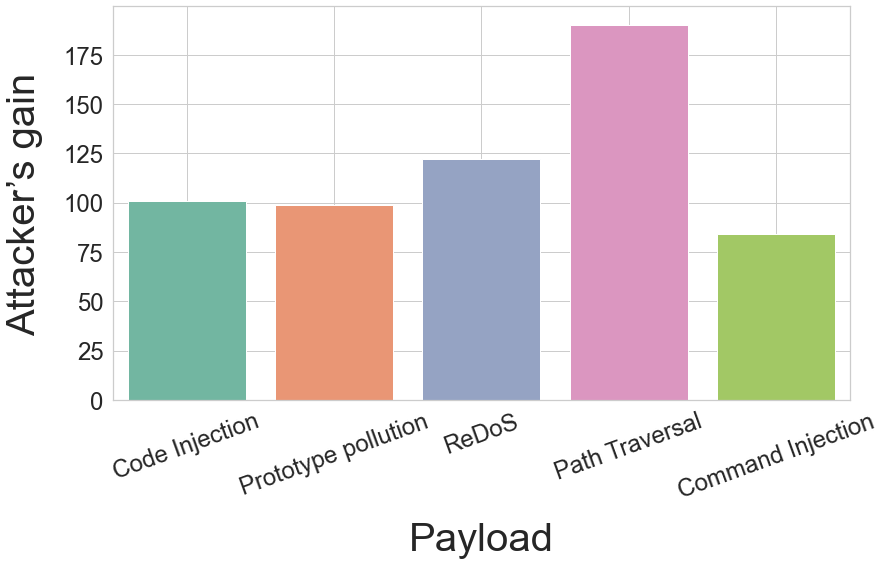

In [119]:
synk_df = pd.read_csv('synk_unique.csv')
# print(synk_df)
legends = ["Prototype pollution", "ReDoS", "Command Injection", "Path Traversal", "Code Injection"]


our_category = ["pollution", "redos", "command", "traversal", "code"]
category_list = synk_df['Vulnerability'].tolist()

exploits_number_dict_synk = dict()

for category in category_list:
    for index in range(len(our_category)):
        item = our_category[index]
        if item in str(category).lower():
            # print(category)
            if legends[index] in exploits_number_dict_synk:
                num = exploits_number_dict_synk[legends[index]]
                exploits_number_dict_synk[legends[index]] = num+1
            else:
                exploits_number_dict_synk[legends[index]] = 1
            break
    
print(exploits_number_dict_synk)

df = pd.DataFrame(exploits_number_dict_synk.items(), columns=['category', 'count'])
# print(df)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams["figure.figsize"] = (12, 8)
fig, ax = plt.subplots()
font_size = 40
legend_font_size = 24

ax = sns.barplot(x="category", y="count", data=df)

ax.set_ylabel("Attacker’s gain", fontsize=font_size, labelpad=20)
ax.set_xlabel("Payload", fontsize=font_size, labelpad=20)

ax.tick_params(axis='both', which='major')
ax.tick_params(axis='y', which='major', labelsize=legend_font_size)
ax.tick_params(axis='x', which='major', labelsize=legend_font_size, rotation=20)
ax.grid("both")
# plt.setp(ax1.get_legend().get_texts(), fontsize=font_size)
fig.tight_layout()
plt.subplots_adjust(top=0.98, right=0.99)


## Categorization (GA)

{'Path Traversal': 41, 'Prototype pollution': 38, 'Command Injection': 40, 'Code Injection': 36, 'ReDoS': 19}


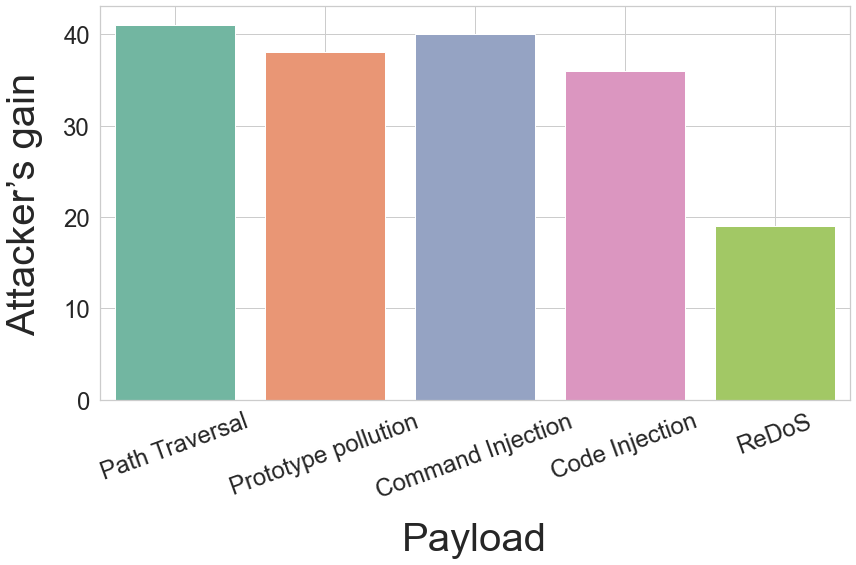

In [137]:
import csv
import pandas as pd
import numpy as np
import math
synk_df = pd.read_csv('ga_unique.csv')
# print(synk_df)
legends = ["Prototype pollution", "ReDoS","ReDoS","ReDoS", "Command Injection", "Path Traversal", "Code Injection"]


our_category = ["pollution", "redos", "regex", "regular expression","command", "traversal", "code"]
title_list = synk_df['Title'].tolist()

count=0
exploits_number_dict_ga = dict()
for title in title_list:
    if "arbitrary code execution" in title:
        if "Code Injection" in exploits_number_dict_ga:
            num = exploits_number_dict_ga["Code Injection"]
            exploits_number_dict_ga["Code Injection"] = num+1
        else:
            exploits_number_dict_ga["Code Injection"] = 1

    elif "Withdrawn" not in title:
        for index in range(len(our_category)):
            item = our_category[index]
            index_of_in = str(title).find("in ")
            if item in str(title[:index_of_in]).lower():
                if "Malicious code" not in title[:index_of_in] and \
                "discord-html" not in title[:index_of_in] and \
                "Hardcoded Initialization Vector" not in title[:index_of_in]:
                    # print(title[:index_of_in], " + ", title[index_of_in:])
                    # count+=1
                    if legends[index] in exploits_number_dict_ga:
                        num = exploits_number_dict_ga[legends[index]]
                        exploits_number_dict_ga[legends[index]] = num+1
                    else:
                        exploits_number_dict_ga[legends[index]] = 1    
                    break

print(exploits_number_dict_ga)

df = pd.DataFrame(exploits_number_dict_ga.items(), columns=['category', 'count'])
# print(df)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams["figure.figsize"] = (12, 8)
fig, ax = plt.subplots()
font_size = 40
legend_font_size = 24

ax = sns.barplot(x="category", y="count", data=df)

ax.set_ylabel("Attacker’s gain", fontsize=font_size, labelpad=20)
ax.set_xlabel("Payload", fontsize=font_size, labelpad=20)

ax.tick_params(axis='both', which='major')
ax.tick_params(axis='y', which='major', labelsize=legend_font_size)
ax.tick_params(axis='x', which='major', labelsize=legend_font_size, rotation=20)
ax.grid("both")
# plt.setp(ax1.get_legend().get_texts(), fontsize=font_size)
fig.tight_layout()
plt.subplots_adjust(top=0.98, right=0.99)


## Categorization (Common)

{'Path Traversal': 176, 'Prototype pollution': 190, 'Code Injection': 78, 'ReDoS': 123, 'Command Injection': 114}


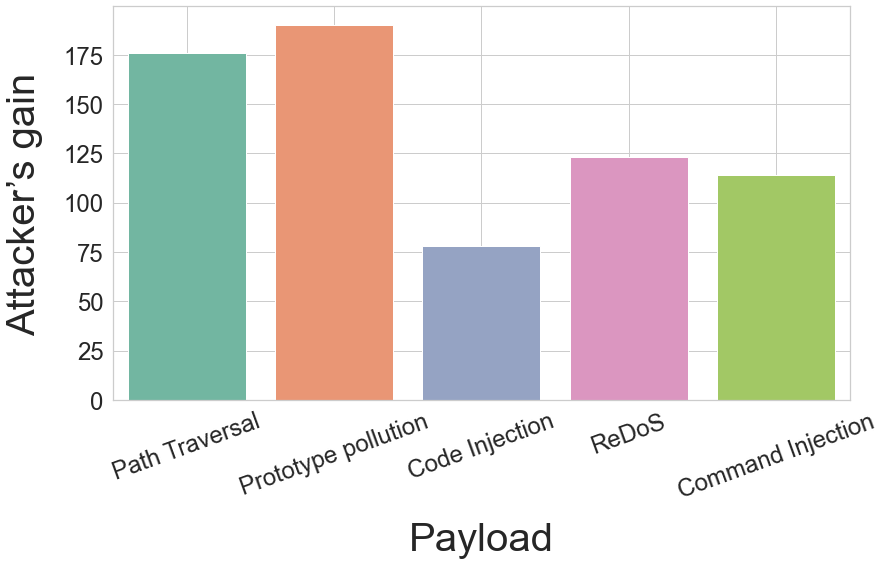

In [121]:
common_df = pd.read_csv('common.csv')
# print(synk_df)
legends = ["Prototype pollution", "ReDoS", "Command Injection", "Path Traversal", "Code Injection"]


our_category = ["pollution", "redos", "command", "traversal", "code"]
category_list = common_df['Vulnerability'].tolist()

exploits_number_dict = dict()

for category in category_list:
    for index in range(len(our_category)):
        item = our_category[index]
        if item in str(category).lower():
            # print(category)
            if legends[index] in exploits_number_dict:
                num = exploits_number_dict[legends[index]]
                exploits_number_dict[legends[index]] = num+1
            else:
                exploits_number_dict[legends[index]] = 1
            break
    
print(exploits_number_dict)

df = pd.DataFrame(exploits_number_dict.items(), columns=['category', 'count'])
# print(df)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams["figure.figsize"] = (12, 8)
fig, ax = plt.subplots()
font_size = 40
legend_font_size = 24

ax = sns.barplot(x="category", y="count", data=df)

ax.set_ylabel("Attacker’s gain", fontsize=font_size, labelpad=20)
ax.set_xlabel("Payload", fontsize=font_size, labelpad=20)

ax.tick_params(axis='both', which='major')
ax.tick_params(axis='y', which='major', labelsize=legend_font_size)
ax.tick_params(axis='x', which='major', labelsize=legend_font_size, rotation=20)
ax.grid("both")
# plt.setp(ax1.get_legend().get_texts(), fontsize=font_size)
fig.tight_layout()
plt.subplots_adjust(top=0.98, right=0.99)


## Current Status (Prototype Pollution)

In [122]:
import glob
import json
import traceback
import pandas as pd

synk_df = pd.read_csv('synk_unique.csv')
synk_cve_lst = synk_df['CVE'].tolist()

ga_df = pd.read_csv('ga_unique.csv')
ga_cve_lst = ga_df['CVE'].tolist()

common_df = pd.read_csv('common.csv')
common_cve_lst = common_df['CVE'].tolist()

pp_working_synk = 0
pp_working_ga = 0
pp_working_common = 0

folders = glob.glob("../prototype-pollution/*")
for folder in folders:
    json_file_path = folder+"/package.json"
    try:
        f = open(json_file_path)
        data = json.load(f)

        test_file = []
        try:
            test_file = glob.glob(folder+"/*.test.js")
            # print(test_file)
            # if len(test_file)==0:
            #     print(folder)
        except:
            traceback.print_exc()

        if "CVE" in data["id"]:
            cve = str(data["id"]).strip()
            if len(test_file)>0:
                if cve in synk_cve_lst:
                    pp_working_synk+=1
                elif cve in ga_cve_lst:
                    pp_working_ga+=1
                elif cve in common_cve_lst:
                    pp_working_common+=1
        elif len(data["id"].strip())==0:
            if len(test_file)>0:
                source1 = data["links"]["source1"]
                source2 = data["links"]["source2"]

                if "snyk" in source1 or "snyk" in source2:
                    pp_working_synk+=1
                elif "GHSA" in source1 or "GHSA" in source2:
                    pp_working_ga+=1


                # print(source1)
                # print(source2)
            
        f.close()
    except:
        # traceback.print_exc()
        pass

print(pp_working_ga)
print(pp_working_common)
print(pp_working_synk)




8
120
56


## Current Status (ReDoS)

In [123]:
import glob
import json
import traceback
import pandas as pd

synk_df = pd.read_csv('synk_unique.csv')
synk_cve_lst = synk_df['CVE'].tolist()

ga_df = pd.read_csv('ga_unique.csv')
ga_cve_lst = ga_df['CVE'].tolist()

common_df = pd.read_csv('common.csv')
common_cve_lst = common_df['CVE'].tolist()

redos_working_synk = 0
redos_working_ga = 0
redos_working_common = 0

folders = glob.glob("../redos/*")
for folder in folders:
    if "validator" not in folder:
        json_file_path = folder+"/package.json"
        try:
            f = open(json_file_path)
            data = json.load(f)

            test_file = []
            try:
                test_file = glob.glob(folder+"/*.test.js")
                # print(test_file)
                # if len(test_file)==0:
                #     print(folder)
            except:
                traceback.print_exc()

            if "CVE" in data["id"]:
                cve = str(data["id"]).strip()
                if len(test_file)>0:
                    if cve in synk_cve_lst:
                        redos_working_synk+=1
                    elif cve in ga_cve_lst:
                        redos_working_ga+=1
                    elif cve in common_cve_lst:
                        redos_working_common+=1
            elif len(data["id"].strip())==0:
                if len(test_file)>0:
                    source1 = data["links"]["source1"]
                    source2 = data["links"]["source2"]

                    if "snyk" in source1 or "snyk" in source2:
                        redos_working_synk+=1
                    elif "GHSA" in source1 or "GHSA" in source2:
                        redos_working_ga+=1


                    # print(source1)
                    # print(source2)
                
            f.close()
        except:
            # traceback.print_exc()
            pass

print(redos_working_ga)
print(redos_working_common)
print(redos_working_synk)




0
48
39


## Current Status (ACE)

In [162]:
import glob
import json
import traceback
import pandas as pd

synk_df = pd.read_csv('synk_unique.csv')
synk_cve_lst = synk_df['CVE'].tolist()

ga_df = pd.read_csv('ga_unique.csv')
ga_cve_lst = ga_df['CVE'].tolist()

common_df = pd.read_csv('common.csv')
common_cve_lst = common_df['CVE'].tolist()

ace_working_synk = 0
ace_working_ga = 0
ace_working_common = 0

excluded_list = ["pixl-class_1.0.0", "mathjs_3.10.0", "wifiscanner_1.0.1", "safer-eval_1.3.1"]

folders = glob.glob("../ace-breakout/*")
for folder in folders:
    index = folder.rfind("/")
    main_folder_name = folder[index+1:]
    if main_folder_name not in excluded_list :
        # print(folder)
        json_file_path = folder+"/package.json"
        try:
            f = open(json_file_path)
            data = json.load(f)

            test_file = []
            try:
                test_file = glob.glob(folder+"/*.test.js")
                # print(test_file)
                # if len(test_file)==0:
                #     print(folder)
            except:
                traceback.print_exc()

            if "CVE" in data["id"]:
                cve = str(data["id"]).strip()
                if len(test_file)>0:
                    if cve in synk_cve_lst:
                        ace_working_synk+=1
                    elif cve in ga_cve_lst:
                        ace_working_ga+=1
                    elif cve in common_cve_lst:
                        ace_working_common+=1
                    
            # elif len(data["id"].strip())==0:
            else:
                if len(test_file)>0:
                    source1 = data["links"]["source1"]
                    source2 = data["links"]["source2"]
                    
                    if "snyk" in source1 or "snyk" in source2:
                        ace_working_synk+=1
                    elif "GHSA" in source1 or "GHSA" in source2:
                        ace_working_ga+=1
                        
                    # print(source1)
                    # print(source2)
                
            f.close()
        except:
            # print(folder)
            traceback.print_exc()
            # pass

print(ace_working_ga)
print(ace_working_common)
print(ace_working_synk)




4
14
14


Traceback (most recent call last):
  File "<ipython-input-162-4080b7bd78ae>", line 29, in <module>
    f = open(json_file_path)
FileNotFoundError: [Errno 2] No such file or directory: '../ace-breakout/node_modules/package.json'
Traceback (most recent call last):
  File "<ipython-input-162-4080b7bd78ae>", line 29, in <module>
    f = open(json_file_path)
NotADirectoryError: [Errno 20] Not a directory: '../ace-breakout/README.md/package.json'
Traceback (most recent call last):
  File "<ipython-input-162-4080b7bd78ae>", line 29, in <module>
    f = open(json_file_path)
NotADirectoryError: [Errno 20] Not a directory: '../ace-breakout/package-lock.json/package.json'
Traceback (most recent call last):
  File "<ipython-input-162-4080b7bd78ae>", line 29, in <module>
    f = open(json_file_path)
NotADirectoryError: [Errno 20] Not a directory: '../ace-breakout/package.json/package.json'
Traceback (most recent call last):
  File "<ipython-input-162-4080b7bd78ae>", line 29, in <module>
    f = ope

## Current Status (command-injection )

In [125]:
import glob
import json
import traceback
import pandas as pd

synk_df = pd.read_csv('synk_unique.csv')
synk_cve_lst = synk_df['CVE'].tolist()

ga_df = pd.read_csv('ga_unique.csv')
ga_cve_lst = ga_df['CVE'].tolist()

common_df = pd.read_csv('common.csv')
common_cve_lst = common_df['CVE'].tolist()

ci_working_synk = 0
ci_working_ga = 0
ci_working_common = 0

excluded_list = ["aws-lambda_1.0.4", "op-browser_1.0.8", "devcert_1.1.0", "node-notifier_8.0.0", "launchpad_0.7.1",]

folders = glob.glob("../command-injection/*")
for folder in folders:
    index = folder.rfind("/")
    main_folder_name = folder[index+1:]
    if main_folder_name not in excluded_list :
        # print(folder)
        json_file_path = folder+"/package.json"
        try:
            f = open(json_file_path)
            data = json.load(f)

            test_file = []
            try:
                test_file = glob.glob(folder+"/*.test.js")
                # print(test_file)
                # if len(test_file)==0:
                #     print(folder)
            except:
                traceback.print_exc()

            if "CVE" in data["id"]:
                cve = str(data["id"]).strip()
                if len(test_file)>0:
                    if cve in synk_cve_lst:
                        ci_working_synk+=1
                    elif cve in ga_cve_lst:
                        ci_working_ga+=1
                    elif cve in common_cve_lst:
                        ci_working_common+=1
            elif len(data["id"].strip())==0:
                if len(test_file)>0:
                    source1 = data["links"]["source1"]
                    source2 = data["links"]["source2"]

                    if "snyk" in source1 or "snyk" in source2:
                        ci_working_synk+=1
                    elif "GHSA" in source1 or "GHSA" in source2:
                        ci_working_ga+=1


                    # print(source1)
                    # print(source2)
                
            f.close()
        except:
            # traceback.print_exc()
            pass

print(ci_working_ga)
print(ci_working_common)
print(ci_working_synk)




1
72
41


## Current Status (path-traversal)

In [126]:
import glob
import json
import traceback
import pandas as pd

synk_df = pd.read_csv('synk_unique.csv')
synk_cve_lst = synk_df['CVE'].tolist()

ga_df = pd.read_csv('ga_unique.csv')
ga_cve_lst = ga_df['CVE'].tolist()

common_df = pd.read_csv('common.csv')
common_cve_lst = common_df['CVE'].tolist()

pt_working_synk = 0
pt_working_ga = 0
pt_working_common = 0

excluded_list = ['hserver-static_0.0.3','rollup-plugin-server_0.7.0', 'litedoc_1.0.1', 
'asset-cache_0.0.6', 'asset-cache_0.0.6', 'node-srv_2.0.0', 'nitro-server_1.3.3', 
'serverhuwenhui_1.1.0', 'bae-nodejs_1.0.0', 'static-server-gx_1.2.1', 'nopach_0.1.1', 
'rollup-plugin-serve_0.4.2', 'serverliujiayi1_1.1.0', 'node-cxc_1.0.0', 
'wuzhuang_1.0.0', 'zhangranbigman_0.0.1', 'myserve111_1.1.2', 'statichttpserver_0.9.7', 
'goserv_1.0.0', 'm-server_1.4.0', 'servewuqianqianqian_1.0.0', 'dilu_0.1.3', 
'fbr-client_1.0.3', 'intsol-package_1.0.0', 'canvas-designer_1.2.1', 'getstats_1.0.6', 
'my-sn_1.0.1']
folders = glob.glob("../path-traversal/*")
for folder in folders:
    index = folder.rfind("/")
    main_folder_name = folder[index+1:]
    if main_folder_name not in excluded_list :
        # print(folder)
        json_file_path = folder+"/package.json"
        try:
            f = open(json_file_path)
            data = json.load(f)

            test_file = []
            try:
                test_file = glob.glob(folder+"/*.test.js")
                # print(test_file)
                # if len(test_file)==0:
                #     print(folder)
            except:
                traceback.print_exc()

            if "CVE" in data["id"]:
                cve = str(data["id"]).strip()
                if len(test_file)>0:
                    if cve in synk_cve_lst:
                        pt_working_synk+=1
                    elif cve in ga_cve_lst:
                        pt_working_ga+=1
                    elif cve in common_cve_lst:
                        pt_working_common+=1
            elif len(data["id"].strip())==0:
                if len(test_file)>0:
                    source1 = data["links"]["source1"]
                    source2 = data["links"]["source2"]

                    if "snyk" in source1 or "snyk" in source2:
                        pt_working_synk+=1
                    elif "GHSA" in source1 or "GHSA" in source2:
                        pt_working_ga+=1


                    # print(source1)
                    # print(source2)
                
            f.close()
        except:
            # traceback.print_exc()
            pass

print(pt_working_ga)
print(pt_working_common)
print(pt_working_synk)




1
70
81


## Graph

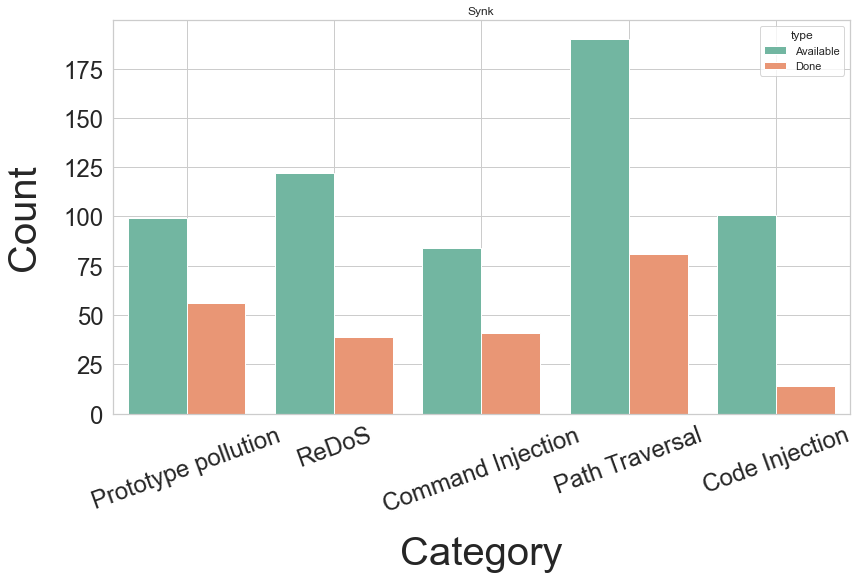

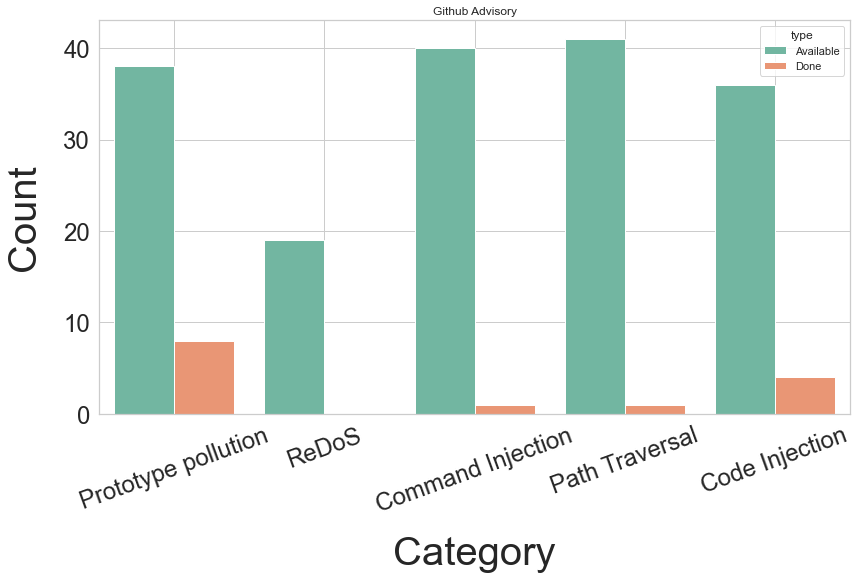

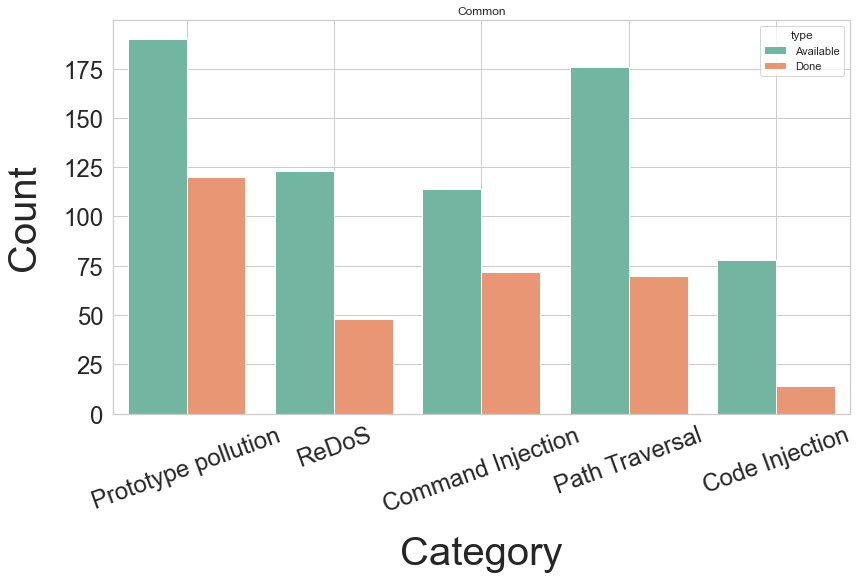

In [140]:
working_ga = [pp_working_ga, redos_working_ga, ci_working_ga , pt_working_ga, ace_working_ga ]
working_synk = [pp_working_synk, redos_working_synk, ci_working_synk , pt_working_synk, ace_working_synk ]
working_common = [pp_working_common, redos_working_common, ci_working_common , pt_working_common, ace_working_common ]

legends = ["Prototype pollution", "ReDoS", "Command Injection", "Path Traversal", "Code Injection"]

## for synk
synk_mainlst = []

# for index in range(len(our_category)):
#     synk_mainlst.append([legends[index], exploits_number_dict_synk[legends[index]], working_synk[index]])
# print(synk_mainlst)


for index in range(len(legends)):
    synk_mainlst.append([legends[index], exploits_number_dict_synk[legends[index]], "Available"])

for index in range(len(legends)):
    synk_mainlst.append([legends[index], working_synk[index], "Done"])



df_synk = pd.DataFrame(synk_mainlst, columns=["category", "count", "type"])
# df_synk
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams["figure.figsize"] = (12, 8)
fig, ax = plt.subplots()
font_size = 40
legend_font_size = 24

ax = sns.barplot(x="category", y="count", hue="type", data=df_synk)

ax.set_ylabel("Count", fontsize=font_size, labelpad=20)
ax.set_xlabel("Category", fontsize=font_size, labelpad=20)

ax.tick_params(axis='both', which='major')
ax.tick_params(axis='y', which='major', labelsize=legend_font_size)
ax.tick_params(axis='x', which='major', labelsize=legend_font_size, rotation=20)
ax.grid("both")
# plt.setp(ax1.get_legend().get_texts(), fontsize=font_size)
fig.tight_layout()
ax.set_title("Synk")
plt.subplots_adjust(top=0.98, right=0.99)



## for GA
ga_mainlst = []

# for index in range(len(our_category)):
#     synk_mainlst.append([legends[index], exploits_number_dict_synk[legends[index]], working_synk[index]])
# print(synk_mainlst)


for index in range(len(legends)):
    ga_mainlst.append([legends[index], exploits_number_dict_ga[legends[index]], "Available"])

for index in range(len(legends)):
    ga_mainlst.append([legends[index], working_ga[index], "Done"])



df_ga = pd.DataFrame(ga_mainlst, columns=["category", "count", "type"])
# df_synk
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams["figure.figsize"] = (12, 8)
fig, ax = plt.subplots()
font_size = 40
legend_font_size = 24

ax = sns.barplot(x="category", y="count", hue="type", data=df_ga)

ax.set_ylabel("Count", fontsize=font_size, labelpad=20)
ax.set_xlabel("Category", fontsize=font_size, labelpad=20)

ax.tick_params(axis='both', which='major')
ax.tick_params(axis='y', which='major', labelsize=legend_font_size)
ax.tick_params(axis='x', which='major', labelsize=legend_font_size, rotation=20)
ax.grid("both")
ax.set_title("Github Advisory")
# plt.setp(ax1.get_legend().get_texts(), fontsize=font_size)
fig.tight_layout()
plt.subplots_adjust(top=0.98, right=0.99)



## for common
common_mainlst = []

# for index in range(len(our_category)):
#     synk_mainlst.append([legends[index], exploits_number_dict_synk[legends[index]], working_synk[index]])
# print(synk_mainlst)


for index in range(len(legends)):
    common_mainlst.append([legends[index], exploits_number_dict[legends[index]], "Available"])

for index in range(len(legends)):
    common_mainlst.append([legends[index], working_common[index], "Done"])



df_common = pd.DataFrame(common_mainlst, columns=["category", "count", "type"])
# df_synk
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams["figure.figsize"] = (12, 8)
fig, ax = plt.subplots()
font_size = 40
legend_font_size = 24

ax = sns.barplot(x="category", y="count", hue="type", data=df_common)

ax.set_ylabel("Count", fontsize=font_size, labelpad=20)
ax.set_xlabel("Category", fontsize=font_size, labelpad=20)

ax.tick_params(axis='both', which='major')
ax.tick_params(axis='y', which='major', labelsize=legend_font_size)
ax.tick_params(axis='x', which='major', labelsize=legend_font_size, rotation=20)
ax.grid("both")
ax.set_title("Common")
# plt.setp(ax1.get_legend().get_texts(), fontsize=font_size)
fig.tight_layout()
plt.subplots_adjust(top=0.98, right=0.99)


In [144]:
with open("/Users/masudulhasanmasudbhuiyan/Music/vulns4js/pt_failed_list.txt") as in_file:
    for line in in_file:
        if "FAIL" in line:
            index = line.rfind("/")
            print(line[6:index])

 node-cxc_1.0.0
 serverhuwenhui_1.1.0
 static-server-gx_1.2.1
 m-server_1.4.0
 hserver-static_0.0.3
 litedoc_1.0.1
 bae-nodejs_1.0.0
 node-srv_2.0.0
 rollup-plugin-server_0.7.0
 asset-cache_0.0.6
 rollup-plugin-serve_0.4.2
 canvas-designer_1.2.1
 fbr-client_1.0.3
 my-sn_1.0.1
 intsol-package_1.0.0
 getstats_1.0.6
 dilu_0.1.3
 serverliujiayi1_1.1.0
 statichttpserver_0.9.7
 http-live-simulator_1.0.0
 crud-file-server_0.7.0
 tinyserver_0.1.1
 serverzyy_1.0.0
 sgqserve_1.0.0
 web-node-server_0.1.0
 wrlc_0.2.5
 fast-http_0.1.3


## Working Exploits

In [714]:
import glob
import json
import traceback
import pandas as pd
import shutil
from beautifultable import BeautifulTable
table = BeautifulTable()
table.set_style(BeautifulTable.STYLE_SEPARATED)
table.columns.alignment = BeautifulTable.ALIGN_RIGHT
table.columns.padding_left = 15
table.columns.padding_right = 15

table.columns.headers = ["Type of vulnerability", "Number of exploits"]

lst = ["prototype-pollution", "ace-breakout", "command-injection", "path-traversal", "redos"]
total_exploits = 0
for _path in lst:
    folders = glob.glob("../"+_path+"/*")
    # print(folders)
    working_exploits = 0
    for folder in folders:
        try:
            if os.path.isdir(folder):
                test_file = glob.glob(folder+"/*.test.js")
                # print(test_file)
                if len(test_file)==0:
                    # if _path == "prototype-pollution" and "node_modules" not in folder:
                    #     try:
                    #         shutil.rmtree(folder)
                    #     except OSError as e:
                    #         print("Error: %s - %s." % (e.filename, e.strerror))
                    pass
                    # print(folder)
                else:
                    working_exploits+=1
        except:
            # traceback.print_exc()
            pass
    # print(_path)
    # print(working_exploits)
    total_exploits+=working_exploits
    table.rows.append([_path,  working_exploits])

table.rows.append(["Total",  total_exploits])
table.columns.headers = ["Type of vulnerability", "Number of exploits"]
print(table)





+=====================+=====+
| prototype-pollution | 192 |
+---------------------+-----+
|    ace-breakout     | 40  |
+---------------------+-----+
|  command-injection  | 101 |
+---------------------+-----+
|   path-traversal    | 169 |
+---------------------+-----+
|        redos        | 98  |
+---------------------+-----+
|        Total        | 600 |
+---------------------+-----+


## Available Sink

In [710]:
import glob
import json
import traceback
import pandas as pd
import shutil
from beautifultable import BeautifulTable
table = BeautifulTable()
table.set_style(BeautifulTable.STYLE_SEPARATED)
table.columns.alignment = BeautifulTable.ALIGN_RIGHT
table.columns.padding_left = 15
table.columns.padding_right = 15

lst = ["prototype-pollution", "ace-breakout", "command-injection", "path-traversal", "redos"]
total_sink=0
for _path in lst:
    folders = glob.glob("../"+_path+"/*")
    
    working_exploits = 0
    individual_sink = 0
    for folder in folders:
        if os.path.isdir(folder) and "node_modules" not in folder:
            json_file_path = folder+"/package.json"
            try:
                f = open(json_file_path)
                data = json.load(f)
                # print(data)

                sink = data["sink"]
                if len(sink.strip())!=0:
                    individual_sink+=1
                    total_sink+=1
            except:
                # traceback.print_exc()
                pass
    
    table.rows.append([_path,  individual_sink])

table.columns.headers = ["Type of vulnerability", "Number of Patch"]
print(table)
print("Total Patch ===> ",total_sink)




+=====================+=====+
| prototype-pollution | 181 |
+---------------------+-----+
|    ace-breakout     | 30  |
+---------------------+-----+
|  command-injection  | 99  |
+---------------------+-----+
|   path-traversal    |  0  |
+---------------------+-----+
|        redos        |  0  |
+---------------------+-----+
Total Patch ===>  310


## Available Patch

In [711]:
import glob
import json
import traceback
import pandas as pd
import shutil
from beautifultable import BeautifulTable
table = BeautifulTable()
table.set_style(BeautifulTable.STYLE_SEPARATED)
table.columns.alignment = BeautifulTable.ALIGN_RIGHT
table.columns.padding_left = 15
table.columns.padding_right = 15

main_lst = []

lst = ["prototype-pollution", "ace-breakout", "command-injection", "path-traversal", "redos"]
availble_patch = 0

for _path in lst:
    folders = glob.glob("../"+_path+"/*")
    
    individual_patch = 0
    individual_unavailable = 0
    for folder in folders:
        if os.path.isdir(folder) and "node_modules" not in folder:
            json_file_path = folder+"/package.json"
            try:
                f = open(json_file_path)
                data = json.load(f)
                # print(data)

                fixed_version = data["fixedVersion"]
                if len(fixed_version.strip())>0 and fixed_version.lower()!="n/a":
                    availble_patch+=1
                    individual_patch+=1
                    # print(fixed_version)
                else:
                    individual_unavailable+=1
            except:
                # traceback.print_exc()
                pass
    
    main_lst.append([individual_unavailable, individual_patch])
    table.rows.append([_path,  individual_patch])

table.columns.headers = ["Type of vulnerability", "Number of Patch"]
print(table)
print("Total Patch ===> ",availble_patch)


+=====================+=====+
| prototype-pollution | 120 |
+---------------------+-----+
|    ace-breakout     | 21  |
+---------------------+-----+
|  command-injection  | 40  |
+---------------------+-----+
|   path-traversal    | 18  |
+---------------------+-----+
|        redos        | 76  |
+---------------------+-----+
Total Patch ===>  275


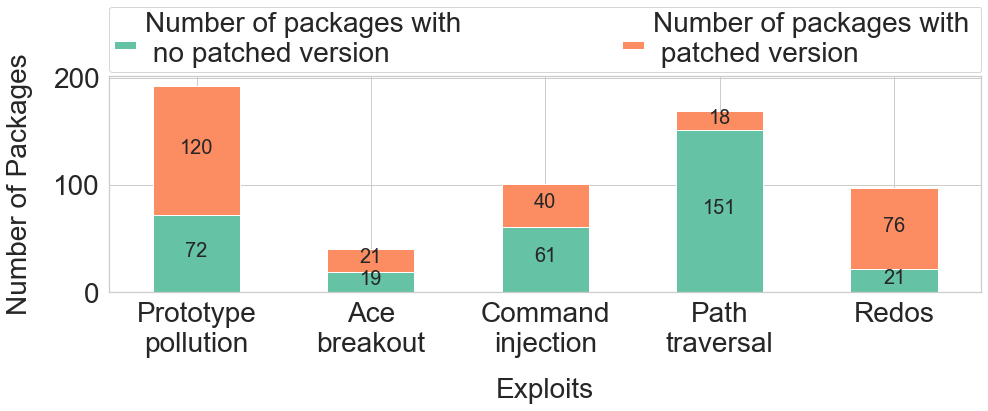

In [712]:
import pandas as pd
import matplotlib.pyplot as plt

# pandas dataframe
df = pd.DataFrame(main_lst, columns=["Number of packages with \n no patched version", "Number of packages with \n patched version"])
df.index = ["Prototype\npollution", "Ace\nbreakout", "Command\ninjection", "Path\ntraversal", "Redos"]

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams["figure.figsize"] = (14, 6)
# fig, ax = plt.subplots()
font_size = 28
legend_font_size = 28

ax = df.plot(kind='bar', stacked=True, rot=0, xlabel='Class', ylabel='Count')
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=20, padding=3)

ax.set_ylabel("Number of Packages", fontsize=font_size, labelpad=20)
ax.set_xlabel("Exploits", fontsize=font_size, labelpad=20)

ax.tick_params(axis='both', which='major')
ax.tick_params(axis='y', which='major', labelsize=legend_font_size)
ax.tick_params(axis='x', which='major', labelsize=legend_font_size, rotation=0)
ax.grid("both")

plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2)
plt.setp(ax.get_legend().get_texts(), fontsize=font_size)
fig.tight_layout()
plt.subplots_adjust(top=0.8, right=0.99, bottom=.3)
plt.savefig("patches.pdf")


## Available Fix commit

In [713]:
import glob
import json
import traceback
import pandas as pd
import shutil
from beautifultable import BeautifulTable
table = BeautifulTable()
table.set_style(BeautifulTable.STYLE_SEPARATED)
table.columns.alignment = BeautifulTable.ALIGN_RIGHT
table.columns.padding_left = 15
table.columns.padding_right = 15

main_lst = []

lst = ["prototype-pollution", "ace-breakout", "command-injection", "path-traversal", "redos"]
availble_commit = 0

for _path in lst:
    folders = glob.glob("../"+_path+"/*")
    
    individual_commit = 0
    individual_unavailable = 0
    for folder in folders:
        if os.path.isdir(folder) and "node_modules" not in folder:
            json_file_path = folder+"/package.json"
            try:
                f = open(json_file_path)
                data = json.load(f)
                # print(data)

                fixed_version = data["fixCommit"]
                if len(fixed_version.strip())>0 and fixed_version.lower()!="n/a":
                    availble_commit+=1
                    individual_commit+=1
                    # print(fixed_version)
                else:
                    individual_unavailable+=1
            except:
                # traceback.print_exc()
                pass
    
    main_lst.append([individual_unavailable, individual_commit])
    table.rows.append([_path,  individual_commit])

table.columns.headers = ["Type of vulnerability", "Number of available commit"]
print(table)
print("Total Commit ===> ",availble_commit)


+=====================+====+
| prototype-pollution | 93 |
+---------------------+----+
|    ace-breakout     | 15 |
+---------------------+----+
|  command-injection  | 36 |
+---------------------+----+
|   path-traversal    | 11 |
+---------------------+----+
|        redos        | 64 |
+---------------------+----+
Total Commit ===>  219


## Figure 1

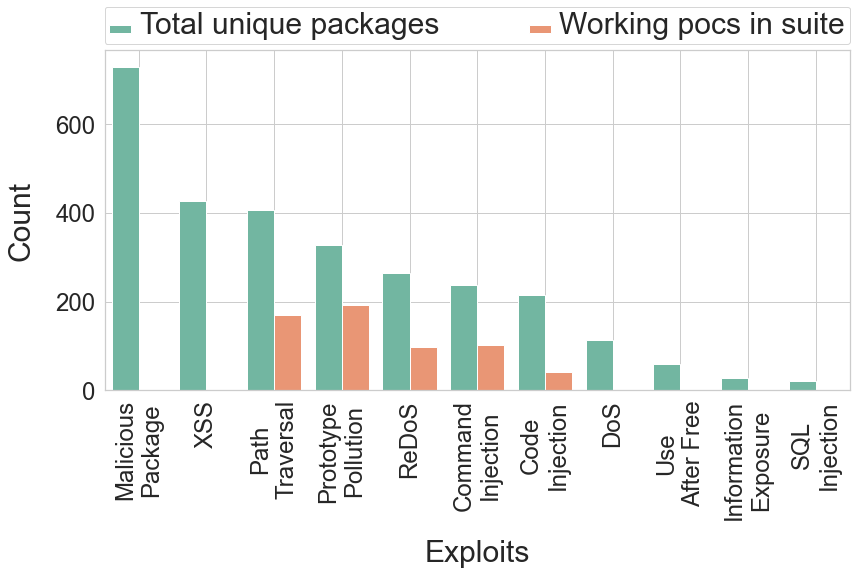

In [149]:
import csv
import pandas as pd
import numpy as np
import math

synk_df = pd.read_csv('synk_unique.csv')
# print(synk_df)
legends = ["Prototype pollution", "ReDoS", "Command Injection", "Path Traversal", "Code Injection"]


our_category = ["pollution", "redos", "command", "traversal", "code"]
category_list = synk_df['Vulnerability'].tolist()

exploits_number_dict = dict()

for category in category_list:
    found = False
    for index in range(len(our_category)):
        item = our_category[index]
        if item in str(category).lower():
            # print(category)
            if legends[index] in exploits_number_dict:
                num = exploits_number_dict[legends[index]]
                exploits_number_dict[legends[index]] = num+1
            else:
                exploits_number_dict[legends[index]] = 1

            found = True
            break
    
    if not found:
        if category in exploits_number_dict:
                num = exploits_number_dict[category]
                exploits_number_dict[category] = num+1
        else:
            exploits_number_dict[category] = 1

# exploits_number_dict = dict(sorted(exploits_number_dict.items(), key=lambda item: item[1], reverse=True))
# for key in exploits_number_dict:
#     print(key, " =====> ", exploits_number_dict[key])


synk_df = pd.read_csv('ga_unique.csv')
legends = ["Prototype pollution", "ReDoS","ReDoS","ReDoS", "Command Injection", "Path Traversal", "Code Injection"]


our_category = ["pollution", "redos", "regex", "regular expression","command", "traversal", "code"]
title_list = synk_df['Title'].tolist()

count=0
for title in title_list:
    # print(title)
    found = False
    if "arbitrary code execution" in title:
        if "Code Injection" in exploits_number_dict:
            num = exploits_number_dict["Code Injection"]
            exploits_number_dict["Code Injection"] = num+1
        else:
            exploits_number_dict["Code Injection"] = 1

    elif "Withdrawn" not in title:
        for index in range(len(our_category)):
            item = our_category[index]
            index_of_in = str(title).find("in ")
            if item in str(title[:index_of_in]).lower():
                if "Malicious code" not in title[:index_of_in] and \
                "discord-html" not in title[:index_of_in] and \
                "Hardcoded Initialization Vector" not in title[:index_of_in]:
                    # print(title[:index_of_in], " + ", title[index_of_in:])
                    # count+=1
                    if legends[index] in exploits_number_dict:
                        num = exploits_number_dict[legends[index]]
                        exploits_number_dict[legends[index]] = num+1
                    else:
                        exploits_number_dict[legends[index]] = 1    
                    found = True
                    break
        
    if not found:
        if "Malicious Package" in title:
            title = "Malicious Package"
        if "Denial of Service" in title:
            title = "Denial of Service (DoS)"
        if "Cross-Site Scripting" in title or "Cross-site scripting" in title:
            title = "Cross-site Scripting (XSS)"
        if title in exploits_number_dict:
                num = exploits_number_dict[title]
                exploits_number_dict[title] = num+1
        else:
            exploits_number_dict[title] = 1


        
common_df = pd.read_csv('common.csv')
# print(synk_df)
legends = ["Prototype pollution", "ReDoS", "Command Injection", "Path Traversal", "Code Injection"]


our_category = ["pollution", "redos", "command", "traversal", "code"]
category_list = common_df['Vulnerability'].tolist()

for category in category_list:
    for index in range(len(our_category)):
        item = our_category[index]
        if item in str(category).lower():
            # print(category)
            if legends[index] in exploits_number_dict:
                num = exploits_number_dict[legends[index]]
                exploits_number_dict[legends[index]] = num+1
            else:
                exploits_number_dict[legends[index]] = 1
            break
    
exploits_number_dict = dict(sorted(exploits_number_dict.items(), key=lambda item: item[1], reverse=True))
final_dict= dict()
for key in exploits_number_dict:
    if exploits_number_dict[key]>=20:
        final_dict[key] = exploits_number_dict[key]
    # print(key, " =====> ", exploits_number_dict[key])

# print(final_dict)


# print(exploits_number_dict_ga)

df = pd.DataFrame(final_dict.items(), columns=['category', 'count'])
# print(df)
lst=["Total unique packages" for x in range(len(df))]
df ['status'] = lst
# print(df)

lst = ["prototype-pollution", "ace-breakout", "command-injection", "path-traversal", "redos"]
legends = ["Prototype pollution", "Code Injection", "Command Injection", "Path Traversal", "ReDoS"]
total_exploits = 0
working_dict = dict()
for index in range(len(lst)):
    _path = lst[index]
    folders = glob.glob("../"+_path+"/*")
    working_exploits = 0
    for folder in folders:
        try:
            if os.path.isdir(folder):
                test_file = glob.glob(folder+"/*.test.js")
                if len(test_file)==0:
                    pass
                else:
                    working_exploits+=1
        except:
            # traceback.print_exc()
            pass
    working_dict[legends[index]] = working_exploits

# print(working_dict)

for item in df['category']:
    if item in working_dict:
        df2 = pd.DataFrame({'category': [item],
                    'count' : [working_dict[item]],
                    'status' : ["Working pocs in suite"]})
    else:
        df2 = pd.DataFrame({'category': [item],
                    'count' : [0],
                    'status' : ["Working pocs in suite"]})
    
    df = pd.concat([df, df2], ignore_index = True, axis = 0)    

# print(df)

legends = ["Malicious\nPackage", "XSS",  "Path\nTraversal", "Prototype\nPollution","ReDoS", "Command\nInjection","Code\nInjection","DoS", "Use\nAfter Free", "Information\nExposure","SQL\nInjection"]
# print(len(legends))
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams["figure.figsize"] = (12, 8)
fig, ax = plt.subplots()
font_size = 30
legend_font_size = 24

ax = sns.barplot(x="category", y="count", hue="status", data=df)

ax.set_xticklabels(legends)
ax.set_ylabel("Count", fontsize=font_size, labelpad=20)
ax.set_xlabel("Exploits", fontsize=font_size, labelpad=20)

ax.tick_params(axis='both', which='major')
ax.tick_params(axis='y', which='major', labelsize=legend_font_size)
ax.tick_params(axis='x', which='major', labelsize=legend_font_size, rotation=90)
ax.grid("both")
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2)
plt.setp(ax.get_legend().get_texts(), fontsize=font_size)
fig.tight_layout()
plt.subplots_adjust(top=0.91, right=0.99, bottom=.32)
plt.savefig("included-classes.pdf")

## NEXT TODO

In [181]:
import glob
import json
import traceback
import pandas as pd

synk_df = pd.read_csv('synk_unique.csv')
# synk_cve_lst = synk_df['CVE'].tolist()
synk_df = synk_df[synk_df['POC Available']==True].reset_index(drop=True)

done_list = []
lst = ["prototype-pollution", "ace-breakout", "command-injection", "path-traversal", "redos"]
total_exploits = 0
for _path in lst:
    folders = glob.glob("../"+_path+"/*")
    working_exploits = 0
    for folder in folders:
        try:
            if os.path.isdir(folder):
                test_file = glob.glob(folder+"/*.test.js")
                # print(test_file)
                if len(test_file)==0:
                    pass
                else:
                    index = folder.find("/",3)
                    end_index = folder.find("_")
                    done_list.append(folder[index+1:end_index])
        except:
            # traceback.print_exc()
            pass

print(len(done_list))
# print(synk_df)
synk_df = synk_df[~synk_df['Package Name'].isin(done_list)].reset_index(drop=True)
# print(len(synk_df))


our_category = ["pollution", "redos", "command", "traversal", "code"]
category_list = synk_df['Vulnerability'].tolist()

index_lst = []

for i in range(len(category_list)):
    category = category_list[i]
    for index in range(len(our_category)):
        item = our_category[index]
        if item in str(category).lower():
            index_lst.append(i)
            break
    
# print("Prospective ====> ", len(index_lst))
synk_df = synk_df.iloc[index_lst].reset_index(drop=True)
# synk_df
print("Synk Prospective ====> ", len(synk_df))

common_df = pd.read_csv('common.csv')
common_df = common_df[common_df['POC Available']==True].reset_index(drop=True)
# print(len(common_df))

common_df = common_df[~common_df['Package Name'].isin(done_list)].reset_index(drop=True)
our_category = ["pollution", "redos", "command", "traversal", "code"]
category_list = common_df['Vulnerability'].tolist()

index_lst = []

for i in range(len(category_list)):
    category = category_list[i]
    for index in range(len(our_category)):
        item = our_category[index]
        if item in str(category).lower():
            index_lst.append(i)
            break
    
# print(len(index_lst))
common_df = common_df.iloc[index_lst].reset_index(drop=True)
# common_df
print("Prospective ====> ", len(common_df))

print("total Prospective ====> ", len(synk_df)+len(common_df))

600
Synk Prospective ====>  105
Prospective ====>  117
total Prospective ====>  222


## Cleanup Metadata

In [300]:
import glob
import json
import traceback
import pandas as pd
import shutil
from beautifultable import BeautifulTable

synk_df = pd.read_csv('synk.csv')
name_list = synk_df['Package Name']
ga_df = pd.read_csv('ga_unique.csv')

main_lst = []

lst = ["prototype-pollution", "ace-breakout", "command-injection", "path-traversal", "redos"]
availble_patch = 0
count = 0
not_available = 0
# for _path in lst:
#     folders = glob.glob("../"+_path+"/*")
    
#     individual_patch = 0
#     individual_unavailable = 0
#     for folder in folders:
#         if os.path.isdir(folder) and "node_modules" not in folder:
#             json_file_path = folder+"/package.json"
#             try:
#                 f = open(json_file_path)
#                 data = json.load(f)
#                 cve = data['id']
#                 # print(cve)
#                 index = folder.find("/",3)
#                 end_index = folder.find("_")
#                 pkg = folder[index+1:end_index]

#                 if len(cve.strip())>0:
#                     df = synk_df[synk_df['CVE']==cve.strip()]
#                     # print(len(df))
#                     # if len(df)==1:
#                     #     index = folder.find("/",3)
#                     #     end_index = folder.find("_")
#                     #     pkg = folder[index+1:end_index]
#                     #     package_name = data['dependencies']
#                     #     lst = []
#                     #     for key in package_name:
#                     #         key = key.replace("/","-").replace("@","").strip()
#                     #         lst.append(key)
#                     #         # print(key) 
#                     #     # if pkg not in lst:
#                     #     #     print(folder)
#                     #     #     print(cve)
#                     # if len(df)==0:
#                     #     if "cwe" not in cve.lower():
#                     #         print(folder, " ==> ", cve)
#                     #         # print(data['links'])
#                 else:
#                     df = synk_df[synk_df['Package Name']==pkg.strip()]
#                     if len(df)>0:
#                         lst = df['CVE'].tolist()
#                         if len(lst)==1:
#                             if str(lst[0])!= 'nan':
#                                 data["id"] = lst[0]
#                                 # print(data)
#                                 # print(folder)
#                                 # with open(json_file_path, 'w+') as fileToSave:
#                                 #     json.dump(data, fileToSave, ensure_ascii=True, indent=4)
#                             else:
#                                 count+=1
#                         # else:
#                             # print(folder)
#                     else:
#                         # print(pkg)
#                         # df = ga_df[ga_df['Package Name']==pkg.strip()]
#                         # if len(df)>0:
#                         #     print(df['CVE'])
#                         #     print(folder)

#                         for key in name_list:
#                             main_key = key
#                             key = key.replace("/","-").replace("@","").strip()
#                             if key == pkg.strip():
#                                 print(folder)
#                                 # print(main_key)
#                                 # print("Found!!!")
#                                 df = synk_df[synk_df['Package Name']==main_key.strip()]
#                                 # print(df)
#                                 break
                
#             except:
#                 # traceback.print_exc()
#                 pass
    
#     main_lst.append([individual_unavailable, individual_patch])

for _path in lst:
    folders = glob.glob("../"+_path+"/*")
    
    individual_patch = 0
    individual_unavailable = 0
    for folder in folders:
        if os.path.isdir(folder) and "node_modules" not in folder:
            json_file_path = folder+"/package.json"
            try:
                f = open(json_file_path)
                data = json.load(f)
                links = data['links']
                index = folder.find("/",3)
                end_index = folder.find("_")
                pkg = folder[index+1:end_index]

                # print(links)
                source1 = links['source1']
                source2 = links['source2']
                # if "lodash" not in folder and (source1 == "https://github.com/advisories/GHSA-779f-wgxg-qr8f" or source2 == "https://github.com/advisories/GHSA-779f-wgxg-qr8f"):
                #     if source1 == "https://github.com/advisories/GHSA-779f-wgxg-qr8f" :
                #         data['links']['source1'] = ""
                #     if source2 == "https://github.com/advisories/GHSA-779f-wgxg-qr8f" :
                #         data['links']['source2'] = ""
                #     print("Error!")
                #     # with open(json_file_path, 'w+') as fileToSave:
                #     #     json.dump(data, fileToSave, ensure_ascii=True, indent=4)

                if source1 == "" and source2 == "":
                    cve = data['id']
                    # print(cve)
                    count+=1
                    df = synk_df[synk_df['Package Name']==pkg.strip()].reset_index(drop=True)
                    if len(df)>0:
                        cve = data['id']
                        print(cve)
                        print(folder)
                        lst = df['CVE'].tolist()
                        if len(lst)==1:
                            # print(df)
                            url = df.iloc[0]['Details Page']
                            # print(url)
                            if lst[0] == cve.strip():
                                # print(folder)
                                data['links']['source1'] = url
                                # with open(json_file_path, 'w+') as fileToSave:
                                #     json.dump(data, fileToSave, ensure_ascii=True, indent=4)
                        # else:
                        #     print("found more!!")
                        #     print(df)
                        #     print(folder)
                    # else:
                    #     print(folder)
                    #     print(data['id'])
                    #     for key in name_list:
                    #         main_key = key
                    #         key = key.replace("/","-").replace("@","").strip()
                    #         if key == pkg.strip():
                    #             print(folder)
                    #             # print(main_key)
                    #             # print("Found!!!")
                    #             df = synk_df[synk_df['Package Name']==main_key.strip()]
                    #             # print(df)
                    #             break                
            except:
                # traceback.print_exc()
                pass

count



8

## Checking source validity

In [427]:
import glob
import json
import traceback
import pandas as pd
import shutil
from beautifultable import BeautifulTable

synk_df = pd.read_csv('synk.csv')
name_list = synk_df['Package Name']
ga_df = pd.read_csv('ga_unique.csv')

main_lst = []

lst = ["prototype-pollution", "ace-breakout", "command-injection", "path-traversal", "redos"]
availble_patch = 0
count = 0
not_available = 0

for _path in lst:
    folders = glob.glob("../"+_path+"/*")
    
    individual_patch = 0
    individual_unavailable = 0
    for folder in folders:
        if os.path.isdir(folder) and "node_modules" not in folder:
            json_file_path = folder+"/package.json"
            try:
                f = open(json_file_path)
                data = json.load(f)
                links = data['links']
                index = folder.find("/",3)
                end_index = folder.find("_")
                pkg = folder[index+1:end_index]

                source1 = links['source1']
                source2 = links['source2']

                source = ""
                if source1 != "" or source2 != "":
                    if "snyk" in source1:
                        source = source1
                    elif "snyk" in source2:
                        source = source2

                    df = synk_df[synk_df['Details Page']==source.strip()].reset_index(drop=True)
                    if len(df)>0:
                        package_name = df.iloc[0]['Package Name'].strip()
                        package_dict = data['dependencies']
                        lst = []
                        for key in package_dict:
                            lst.append(key.strip("'").strip())
                        
                        if package_name in lst:
                            pass
                            # df_1 = synk_df[synk_df['Package Name']==lst[0].strip()].reset_index(drop=True)
                            # if len(df_1)==0:
                            #     # print("ooopss!")
                            #     # print(package_name)
                            #     # print(folder)
                            #     # print(source)
                            #     # print(df.iloc[0]['Details Page'])
                            #     # print()
                            #     pass
                            # elif len(df_1)==1:
                            #     print(package_name)
                            #     print(folder)
                            #     print(lst)
                            #     url = df_1.iloc[0]['Details Page']
                            #     print("URL ", url)
                            #     if "snyk" in source1:
                            #         data['links']['source1'] = url
                            #     elif "snyk" in source2:
                            #         data['links']['source2'] = url
                            #     # with open(json_file_path, 'w+') as fileToSave:
                            #     #     json.dump(data, fileToSave, ensure_ascii=True, indent=4)
                                
                            # else:
                            #     # print(df_1)
                            #     print(folder)
                        else:
                            print(lst)
                            print(package_name)

                        #     count+=1
                    else:
                        count+=1
                        # source = source1 if source1!="" else source2
                        # print(source)
                        # print(folder)
                        # df = ga_df[ga_df['Details Page']==source.strip()].reset_index(drop=True)
                        # if len(df)==0:
                        #     print("Error!")
                # else:
                    # print(folder)                    
            except:
                # traceback.print_exc()
                pass

count


['Templ8']
templ8
['Proto']
proto
['connie']
connie-lang
['platform']
platform.js
['htmlparser']
node-htmlparser-classic


24

## Checking CVE validity

In [413]:
import glob
import json
import traceback
import pandas as pd
import shutil
from beautifultable import BeautifulTable

synk_df = pd.read_csv('synk.csv')
name_list = synk_df['Package Name']
ga_df = pd.read_csv('ga_unique.csv')

main_lst = []

lst = ["prototype-pollution", "ace-breakout", "command-injection", "path-traversal", "redos"]
availble_patch = 0
count = 0
not_available = 0

for _path in lst:
    folders = glob.glob("../"+_path+"/*")
    
    individual_patch = 0
    individual_unavailable = 0
    for folder in folders:
        if os.path.isdir(folder) and "node_modules" not in folder:
            json_file_path = folder+"/package.json"
            try:
                f = open(json_file_path)
                data = json.load(f)
                cve = data['id']
                index = folder.find("/",3)
                end_index = folder.find("_")
                pkg = folder[index+1:end_index].strip()

                links = data['links']
                source1 = links['source1']
                source2 = links['source2']

                if cve!="":
                    source = ""
                    if "snyk" in source1:
                        source = source1
                    elif "snyk" in source2:
                        source = source2
            
                    df = synk_df[synk_df['CVE']==cve.strip()].reset_index(drop=True)
                    df = df[df['Details Page']==source.strip()].reset_index(drop=True)
                    if len(df)>0:
                        package_name = df.iloc[0]['Package Name'].strip()
                        package_dict = data['dependencies']
                        lst = []
                        for key in package_dict:
                            # key = key.replace("/","-").replace("@","").strip()
                            lst.append(key.strip())

                        # if package_name not in lst:
                            # print(lst)
                            # print(package_name)
                            # print(source1)
                            # print(source2)
                            # print(df)
                            # print(folder)
                            # print(data)
                            # print()
                else:
                    df = synk_df[synk_df['Package Name']==pkg.strip()].reset_index(drop=True)
                    if len(df)>0:
                        if len(df)==1:
                            cve = df.iloc[0]['CVE']
                            if str(cve).strip() != "nan":
                                print(cve)
                        else:
                            source = ""
                            if source1 != "" or source2 != "":
                                if "snyk" in source1:
                                    source = source1
                                elif "snyk" in source2:
                                    source = source2
                                df_1 = synk_df[synk_df['Details Page']==source.strip()].reset_index(drop=True)
                                if len(df_1)==0:
                                    # print(source1)
                                    # print(source2)
                                    # print(folder)
                                    pass
                                else:
                                    cve = df_1.iloc[0]['CVE']
                                    if str(cve).strip() != "nan":
                                        print(folder)
                                        print(cve)
                    else:
                        print(folder)
                        print(data)
                        not_available+=1            
            except:
                # print(folder)
                # traceback.print_exc()
                pass

count , not_available


../prototype-pollution/fluentui-styles_0.47.15
{'id': '', 'dependencies': {'@fluentui/styles': '0.47.15'}, 'links': {'source1': 'https://security.snyk.io/vuln/SNYK-JS-FLUENTUISTYLES-570808', 'source2': ''}, 'fixedVersion': '0.50.0', 'fixCommit': 'n/a', 'sink': './set.js:36'}
../prototype-pollution/brikcss-merge_1.3.0
{'id': '', 'dependencies': {'@brikcss/merge': '1.3.0'}, 'links': {'source1': 'https://security.snyk.io/vuln/SNYK-JS-BRIKCSSMERGE-1727594', 'source2': ''}, 'fixedVersion': 'N/A', 'fixCommit': 'N/A', 'sink': 'merge/dist/lib/merge.js:2:1599'}
../prototype-pollution/flat-wrap_1.0.2
{'id': '', 'dependencies': {'flat-wrap': '1.0.2'}, 'links': {'source1': 'https://github.com/advisories/GHSA-g7h8-p22m-2rvx', 'source2': ''}, 'fixedVersion': 'n/a', 'fixCommit': 'n/a', 'sink': './set.js:36'}
../prototype-pollution/sahmat_1.0.0
{'id': '', 'dependencies': {'sahmat': '1.0.0'}, 'links': {'source1': 'https://github.com/advisories/GHSA-83pq-466j-fc6j', 'source2': ''}, 'fixedVersion': 'n/a'

(0, 14)

## Clean up GA source

In [494]:
import glob
import json
import traceback
import pandas as pd
import shutil
from beautifultable import BeautifulTable

synk_df = pd.read_csv('synk.csv')
name_list = synk_df['Package Name']
ga_df = pd.read_csv('../github_advisory.csv')

main_lst = []

lst = ["prototype-pollution", "ace-breakout", "command-injection", "path-traversal", "redos"]
availble_patch = 0
count = 0
not_available = 0
missed = 0

for _path in lst:
    folders = glob.glob("../"+_path+"/*")
    
    individual_patch = 0
    individual_unavailable = 0
    for folder in folders:
        if os.path.isdir(folder) and "node_modules" not in folder:
            json_file_path = folder+"/package.json"
            try:
                f = open(json_file_path)
                data = json.load(f)
                cve = data['id']
                index = folder.find("/",3)
                end_index = folder.find("_")
                pkg = folder[index+1:end_index].strip()

                links = data['links']
                source1 = links['source1']
                source2 = links['source2']
                if len(links)==2:
                    if source1!="" or source2!="":
                        source = ""
                        if "github" in source1:
                            source = source1
                        elif "github" in source2:
                            source = source2
                        
                        if source == "":
                            missed+=1
                            df = ga_df[ga_df['CVE']==cve.strip()].reset_index(drop=True)
                            if len(df)>0:
                                details_page_df = df.iloc[0]['Details Page'].strip()
                                details_page_df = str(details_page_df).replace("com//","com/")
                                print(details_page_df)
                                print(data)
                                if "snyk" in source1:
                                    data['links']['source2']=details_page_df
                                elif "snyk" in source2:
                                    data['links']['source1']=details_page_df
                                # print(data)
                            else:
                                package_dict = data['dependencies']
                                lst = []
                                for key in package_dict:
                                    # key = key.replace("/","-").replace("@","").strip()
                                    lst.append(key.strip())
                                actual_package = ""
                                for key in lst:
                                    key = key.replace("/","-").replace("@","").strip()
                                    if key in folder:
                                        actual_package = key
                                df_1 = ga_df[ga_df['Package Name']==actual_package.strip()].reset_index(drop=True)
                                if len(df_1)>0:
                                    details_page_df = df_1.iloc[0]['Details Page'].strip()
                                    details_page_df = str(details_page_df).replace("com//","com/")
                                    # print(details_page_df)
                                else:
                                    details_page_df =""
                                # print(data)
                                if "snyk" in source1:
                                    data['links']['source2']=details_page_df
                                elif "snyk" in source2:
                                    data['links']['source1']=details_page_df
                                
                                # with open(json_file_path, 'w+') as fileToSave:
                                #     json.dump(data, fileToSave, ensure_ascii=True, indent=4)

                        else:
                            df = ga_df[ga_df['CVE']==cve.strip()].reset_index(drop=True)
                            # print(source)
                            # print(data)
                            if len(df)>0:
                                details_page_df = df.iloc[0]['Details Page'].strip()
                                details_page_df = str(details_page_df).replace("com//","com/")
                                # print(details_page_df)

                                if "snyk" in source1:
                                    data['links']['source2']=details_page_df
                                elif "snyk" in source2:
                                    data['links']['source1']=details_page_df
                                # print(data)
                                
                                # with open(json_file_path, 'w+') as fileToSave:
                                #     json.dump(data, fileToSave, ensure_ascii=True, indent=4)
                            else:
                                source = str(source).replace("com/","com//")
                                df = ga_df[ga_df['Details Page']==source.strip()].reset_index(drop=True)
                                if len(df)>0:
                                    package_name = df.iloc[0]['Package Name'].strip()
                                    package_dict = data['dependencies']
                                    lst = []
                                    for key in package_dict:
                                        # key = key.replace("/","-").replace("@","").strip()
                                        lst.append(key.strip())
                                    if package_name not in lst:
                                        print(package_name)
                                        print(folder)
                                        print(data)
                                        
                                        actual_package = ""
                                        for key in lst:
                                            key = key.replace("/","-").replace("@","").strip()
                                            if key in folder:
                                                actual_package = key
                                        
                                        df_1 = ga_df[ga_df['Package Name']==actual_package.strip()].reset_index(drop=True)
                                        print(df_1)
                                        if len(df_1)>0:
                                            details_page_df = df_1.iloc[0]['Details Page'].strip()
                                            details_page_df = str(details_page_df).replace("com//","com/")
                                            print(details_page_df)
                                        else:
                                            details_page_df =""

                                        if "snyk" in source1:
                                            data['links']['source2']=details_page_df
                                        elif "snyk" in source2:
                                            data['links']['source1']=details_page_df
                                        # print(data)
                                        
                                        # with open(json_file_path, 'w+') as fileToSave:
                                        #     json.dump(data, fileToSave, ensure_ascii=True, indent=4)
                                        print()
                                    else:
                                        count+=1
                                else:
                                    not_available+=1
                else:
                    # print(data)
                    pass            
            except:
                # print(folder)
                # traceback.print_exc()
                pass

count , not_available, missed


(49, 8, 191)

## CVE sanity check

In [ ]:
import glob
import json
import traceback
import pandas as pd
import shutil
from beautifultable import BeautifulTable

def get_cve_from_synk(url,synk_df):
    cve=""
    df = synk_df[synk_df['Details Page']==url.strip()].reset_index(drop=True)
    # print(df)
    if len(df)>0:
        cve = df.iloc[0]['CVE']
        if str(cve)!="nan":
            cve = cve.strip()
        else:
            cve=""
    return cve

def get_url_from_synk(cve,synk_df):
    url=""
    df = synk_df[synk_df['CVE']==cve.strip()].reset_index(drop=True)
    if len(df)>0:
        cve = df.iloc[0]['Details Page'].strip()
    return url


def get_url_from_ga(cve,ga_df):
    url=""
    df = ga_df[ga_df['CVE']==cve.strip()].reset_index(drop=True)
    if len(df)>0:
        cve = df.iloc[0]['Details Page'].strip()
    return url

def get_cve_from_ga(url,ga_df):
    cve=""
    df = ga_df[ga_df['Details Page']==url.strip()].reset_index(drop=True)
    if len(df)>0:
        cve = df.iloc[0]['CVE']
        if str(cve)!="nan":
            cve = cve.strip()
        else:
            cve=""
    return cve


synk_df = pd.read_csv('synk.csv')
name_list = synk_df['Package Name']
ga_df = pd.read_csv('../github_advisory.csv')

main_lst = []

lst = ["prototype-pollution", "ace-breakout", "command-injection", "path-traversal", "redos"]
availble_patch = 0
count = 0
not_available = 0
missed = 0
matched=0
for _path in lst:
    folders = glob.glob("../"+_path+"/*")
    
    individual_patch = 0
    individual_unavailable = 0
    for folder in folders:
        if os.path.isdir(folder) and "node_modules" not in folder:
            json_file_path = folder+"/package.json"
            try:
                f = open(json_file_path)
                data = json.load(f)
                cve = data['id'].strip()
                
                links = data['links']
                source1 = links['source1']
                source2 = links['source2']
                if len(links)==2:
                    if source1!="" or source2!="":
                        source = ""
                        if "snyk" in source1:
                            source = source1
                        elif "snyk" in source2:
                            source = source2
                        
                        cve_df = get_cve_from_synk(source, synk_df)
                        if cve_df!=cve:
                            url = get_url_from_synk(cve, synk_df)
                            if url!="":
                                print("Got url =========>>>>>>>>>")
                                print(folder)
                                print(url)
                            else:
                                source = ""
                                if "github" in source1:
                                    source = source1
                                elif "github" in source2:
                                    source = source2
                                source = str(source).replace("com/","com//")
                                cve_ga = get_cve_from_ga(source, ga_df)
                                if cve_ga!=cve:
                                    url = get_url_from_ga(cve, ga_df)
                                    if url!="":
                                        print(folder)
                                        print(url)
                                    print(folder)
                                    print("actual ===> ", cve_ga)
                                    print("now ==> ", cve)
                                else:
                                    matched+=1
                        else:
                            matched+=1
                    else:
                        not_available+=1
                else:
                    count+=1
                                        
            except:
                # print(folder)
                # traceback.print_exc()
                pass

count , not_available, missed, matched


## Fix fixed version

In [596]:
import glob
import json
import traceback
import pandas as pd
import shutil
from beautifultable import BeautifulTable

synk_df = pd.read_csv('synk.csv')
temp_df = synk_df[['Package Name', 'CVE', 'Affected Version','Details Page']].reset_index(drop=True)
cve_lst = temp_df['CVE'].tolist()
cve_lst = list(filter(lambda x: str(x) != 'nan', cve_lst))
# print(cve_lst)

# name_list = synk_df['Package Name']
ga_df = pd.read_csv('../github_advisory.csv')
temp_df_1 = ga_df[['Package Name', 'CVE', 'Affected Version','Details Page']].reset_index(drop=True)
temp_df_1 = temp_df_1[~temp_df_1['CVE'].isin(cve_lst)].reset_index(drop=True)
# temp_df_1
main_df = pd.concat([temp_df, temp_df_1]).reset_index(drop=True)
# main_df

lst = ["prototype-pollution", "ace-breakout", "command-injection", "path-traversal", "redos"]
availble_patch = 0
count = 0
not_available = 0
missed = 0
matched=0
for _path in lst:
    folders = glob.glob("../"+_path+"/*")
    individual_patch = 0
    individual_unavailable = 0
    for folder in folders:
        if os.path.isdir(folder) and "node_modules" not in folder:
            json_file_path = folder+"/package.json"
            try:
                f = open(json_file_path)
                data = json.load(f)
                cve = data['id'].strip()
                if cve !="":
                    df = main_df[main_df['CVE']==cve.strip()].reset_index(drop=True)
                    # print(data)
                    if len(df)>=2:
                        count+=1
                        if "rollup-plugin-serve" not in folder:
                            # print(folder)
                            package_dict = data['dependencies']
                            lst = []
                            for key in package_dict:
                                lst.append(key.strip())
                            
                            for i in range(len(df)):
                                package_name = df.iloc[i]['Package Name'].strip()
                                if package_name in lst:
                                    affected_version = df.iloc[i]['Affected Version'].strip()
                                    if affected_version =="*":
                                        affected_version = "n/a"
                                    else:
                                        index = affected_version.rfind("<")
                                        affected_version = affected_version[index+1:]
                                        # print(affected_version)
                                    
                                    data['fixedVersion']=affected_version
                                    # print(data)
                                    # with open(json_file_path, 'w+') as fileToSave:
                                    #     json.dump(data, fileToSave, ensure_ascii=True, indent=4)
                                    
                                    break
                            # print(data)
                            # print(df)
                            # print(df['Affected Version'].tolist())
                    elif len(df)==1:
                        matched+=1
                        affected_version = df.iloc[i]['Affected Version'].strip()
                        # print("full===> ", affected_version)
                        if affected_version =="*":
                            affected_version = "n/a"
                        else:
                            index = affected_version.rfind("<")
                            if index!= -1:
                                affected_version = affected_version[index+1:]
                            else:
                                affected_version = "n/a"
                        # print(affected_version)
                        data['fixedVersion']=affected_version
                        # with open(json_file_path, 'w+') as fileToSave:
                        #     json.dump(data, fileToSave, ensure_ascii=True, indent=4)
                    else:
                        # print("Checked manually. Everything ok")
                        missed+=1
                else:
                    links = data['links']
                    source1 = links['source1']
                    source2 = links['source2']
                    if source1!="" or source2!="":
                        source = ""
                        source = source1 if source1!="" else source2
                        if "github" in source:
                            source = str(source).replace("com/","com//")

                        df = main_df[main_df['Details Page']==source.strip()].reset_index(drop=True)
                        if len(df)==1:
                            # matched+=1
                            affected_version = df.iloc[i]['Affected Version'].strip()
                            # print("full===> ", affected_version)
                            if affected_version =="*":
                                affected_version = "n/a"
                            else:
                                index = affected_version.rfind("<")
                                if index!= -1:
                                    affected_version = affected_version[index+1:]
                                else:
                                    affected_version = "n/a"
                            # print(affected_version)
                            data['fixedVersion']=affected_version
                            # with open(json_file_path, 'w+') as fileToSave:
                            #     json.dump(data, fileToSave, ensure_ascii=True, indent=4)
                        else:
                            print("Checked manually. Everything not ok")
                            missed+=1
                    else:
                        not_available+=1
      
            except:
                # print(folder)
                # traceback.print_exc()
                pass

count , not_available, missed, matched


Checked manually. Everything not ok
Checked manually. Everything not ok
Checked manually. Everything not ok
Checked manually. Everything not ok
Checked manually. Everything not ok


(16, 1, 12, 384)

## Fix fix commit

In [650]:
import glob
import json
import traceback
import pandas as pd
import shutil
from beautifultable import BeautifulTable
import os
import requests
import collections
from bs4 import BeautifulSoup
import re

def get_fix_commit(url):
    github_url = "n/a"
    try:
        details_page = requests.get(url)

        details_soup = BeautifulSoup(details_page.content, 'html.parser')
        spans=details_soup.find_all('span',"cve")
        # print(details_page.text)
        m = re.search(r"https:\/\/github\.com.+\/commit", str(details_page.text))
        if m:
            index_of_braket = str(details_page.text).index("\">", m.start())
            # print(index_of_braket)
            github_url = str(details_page.text)[m.start():index_of_braket]
            # print(github_url)
        
    except:
        traceback.print_exc()
    
    return github_url
                



synk_df = pd.read_csv('synk.csv')
temp_df = synk_df[['Package Name', 'CVE', 'Github Link','Details Page']].reset_index(drop=True)
cve_lst = temp_df['CVE'].tolist()
cve_lst = list(filter(lambda x: str(x) != 'nan', cve_lst))
# print(cve_lst)

# # name_list = synk_df['Package Name']
# ga_df = pd.read_csv('../github_advisory.csv')
# temp_df_1 = ga_df[['Package Name', 'CVE', 'Affected Version','Details Page']].reset_index(drop=True)
# temp_df_1 = temp_df_1[~temp_df_1['CVE'].isin(cve_lst)].reset_index(drop=True)
# # temp_df_1
# main_df = pd.concat([temp_df, temp_df_1]).reset_index(drop=True)
main_df = synk_df

lst = ["prototype-pollution", "ace-breakout", "command-injection", "path-traversal", "redos"]
availble_patch = 0
count = 0
not_available = 0
missed = 0
matched=0
for _path in lst:
    folders = glob.glob("../"+_path+"/*")
    individual_patch = 0
    individual_unavailable = 0
    for folder in folders:
        if os.path.isdir(folder) and "node_modules" not in folder:
            json_file_path = folder+"/package.json"
            try:
                f = open(json_file_path)
                data = json.load(f)
                cve = data['id'].strip()
                if cve !="":
                    df = main_df[main_df['CVE']==cve.strip()].reset_index(drop=True)
                    if len(df)>=2:
                        count+=1
                        if "rollup-plugin-serve" not in folder:
                            # print(folder)
                            package_dict = data['dependencies']
                            lst = []
                            for key in package_dict:
                                lst.append(key.strip())
                            
                            for i in range(len(df)):
                                package_name = df.iloc[i]['Package Name'].strip()
                                if package_name in lst:
                                    fixed_commit = df.iloc[i]['Github Link'].strip()    
                                    data['fixCommit']=fixed_commit
                                    # print(data)
                                    # with open(json_file_path, 'w+') as fileToSave:
                                    #     json.dump(data, fileToSave, ensure_ascii=True, indent=4)
                                    break
                    elif len(df)==1:
                        matched+=1
                        fixed_commit = df.iloc[i]['Github Link'].strip()    
                        data['fixCommit']=fixed_commit
                        # with open(json_file_path, 'w+') as fileToSave:
                        #     json.dump(data, fileToSave, ensure_ascii=True, indent=4)
                    else:
                        # print("Checked manually. Everything ok")
                        links = data['links']
                        source1 = links['source1']
                        source2 = links['source2']
                        source =""
                        if "snyk" in source1:
                            source= source1
                        else:
                            source=source2
                        if source !="":
                            github_url = get_fix_commit(source)
                            data['fixCommit']=github_url
                            # with open(json_file_path, 'w+') as fileToSave:
                            #     json.dump(data, fileToSave, ensure_ascii=True, indent=4)
                            missed+=1
                else:
                    links = data['links']
                    source1 = links['source1']
                    source2 = links['source2']
                    if source1!="" or source2!="":
                        source = ""
                        source = source1 if "snyk" in source1 else source2

                        df = main_df[main_df['Details Page']==source.strip()].reset_index(drop=True)
                        if len(df)==1:
                            fixed_commit = df.iloc[i]['Github Link'].strip()    
                            data['fixCommit']=fixed_commit
                            # with open(json_file_path, 'w+') as fileToSave:
                            #     json.dump(data, fileToSave, ensure_ascii=True, indent=4)
                        else:
                            print("Checked manually. Everything not ok")
                            missed+=1
                    else:
                        # print(data)
                        not_available+=1
      
            except:
                # print(folder)
                # traceback.print_exc()
                pass

count , not_available, missed, matched


Checked manually. Everything not ok
Checked manually. Everything not ok
Checked manually. Everything not ok
Checked manually. Everything not ok
Checked manually. Everything not ok
Checked manually. Everything not ok
Checked manually. Everything not ok
Checked manually. Everything not ok
Checked manually. Everything not ok


(16, 1, 19, 379)

## Update sink info

In [708]:
import glob
import json
import traceback
import pandas as pd
import shutil
from beautifultable import BeautifulTable
import os
import requests
import collections
from bs4 import BeautifulSoup
import re

sink_dict={}
# file_path = "../sink_locations_command-injection.txt"
# file_path = "../sink_locations_prototype_pollution.txt"
file_path = "../sink_locations_ace_breakout.txt"
with open(file_path,"r+") as in_file:
    for line in in_file:
        if len(line.strip())>0:
            parts = line.split(">")
            # print(parts)
            sink_dict[parts[0].strip()] = parts[1].strip()

# print(sink_dict)

# lst = ["prototype-pollution", "ace-breakout", "command-injection", "path-traversal", "redos"]
lst = ["ace-breakout"]
availble_patch = 0
count = 0
not_available = 0
missed = 0
matched=0
for _path in lst:
    folders = glob.glob("../"+_path+"/*")
    individual_patch = 0
    individual_unavailable = 0
    for folder in folders:
        if os.path.isdir(folder) and "node_modules" not in folder:
            json_file_path = folder+"/package.json"
            try:
                f = open(json_file_path)
                data = json.load(f)
                
                last_index = folder.rfind("/")
                folder_name = folder[last_index+1:].strip()
                if folder_name in sink_dict:
                    count+=1
                    sink = sink_dict[folder_name]
                else:
                    not_available+=1
                    sink = ""

                data['sink']=sink
                with open(json_file_path, 'w+') as fileToSave:
                    json.dump(data, fileToSave, ensure_ascii=True, indent=4)
                # print(data)
                # commit = data['fixCommit']
                # print(commit)
                # if "severity"in commit:
                #     # print(commit)
                #     # commit = commit.encode("windows-1252").decode("utf-8")
                #     import codecs
                #     # print(codecs.decode(commit, 'unicode-escape'))
                #     # commit =  commit.replace("\u002F", "//").encode().decode('unicode_escape')
                #     commit =  commit.replace("\\u002F", "/")
                #     index = commit.find(")\",severity:")
                #     commit = commit[:index]
                #     print(commit)
                #     data['fixCommit']=commit
                #     with open(json_file_path, 'w+') as fileToSave:
                #         json.dump(data, fileToSave, ensure_ascii=True, indent=4)
                        
            except:
                # print(folder)
                traceback.print_exc()
                pass

count, not_available

(30, 10)

In [14]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import json
import traceback
import shutil
total_list=[]
lst = ["prototype-pollution", "ace-breakout", "command-injection", "path-traversal", "redos"]
total_exploits = 0
for _path in lst:
    folders = glob.glob("../"+_path+"/*")
    # print(folders)
    working_exploits = 0
    for folder in folders:
        try:
            if os.path.isdir(folder):
                test_file = glob.glob(folder+"/*.test.js")
                if len(test_file)==0:
                    pass
                    # print(folder)
                else:
                    json_file_path = folder+"/package.json"
                    f = open(json_file_path)
                    data = json.load(f)
                    for key in data['dependencies']:
                        if key not in total_list:
                            total_list.append(key)
                    total_exploits+=1
        except:
            # traceback.print_exc()
            pass

print(len(total_list))
print(total_exploits)


df1 = pd.read_csv ('../analyses/graphs/vuln-versions_new.csv')
df1.columns=['name','not_vulnerable','vulnerable']
# print(df1)

df2 = pd.read_csv ('../analyses/graphs/vuln-versions_redos.csv')
df2.columns=['name','not_vulnerable','vulnerable']
# print(df)

df3 = pd.read_csv ('../analyses/graphs/vuln-versions_ace-breakout.csv')
df3.columns=['name','not_vulnerable','vulnerable']
# print(df1)

df4 = pd.read_csv ('../analyses/graphs/vuln-versions_command-injection.csv')
df4.columns=['name','not_vulnerable','vulnerable']
# print(df)

df5 = pd.read_csv ('../analyses/graphs/vuln-versions_path-traversal.csv')
df5.columns=['name','not_vulnerable','vulnerable']
# print(df1)


df = pd.concat([df1, df2,df3,df4,df5])
print(len(df))

package_list = df['name'].tolist()
count = 0
for x in total_list:
    if x not in package_list and "sleep" not in x:
        count+=1
        print(x)

print("Count ===>> ", count)

df = df[df['vulnerable']!=0]
print(len(df))

package_list = df['name'].tolist()
count = 0
print("Velnerable zero ==================================================>> ")
for x in total_list:
    if x not in package_list and "sleep" not in x:
        count+=1
        print(x)

print("Count ===>> ", count)

581
599
575
each-props
is-arguments
101
@uifabric/utilities
veval
reduce-css-calc
wincred
zwserver
prototype
chrono-node
markdown-to-jsx
remarkable
method-override
Count ===>>  13
533
Velnerable zero ==================================================>> 
@aws-sdk/shared-ini-file-loader
ini
properties-reader
inireader
object-path
each-props
is-arguments
ion-parser
nconf-toml
101
utilitify
jquery
js-ini
@uifabric/utilities
node-ini
iniparserjs
multi-ini
wifiscanner
veval
reduce-css-calc
mongo-parse
codecov
wincred
@babel/highlight
my-sn
getstats
node-srv
m-server
fakelearnnodejs
node-cxc
intsol-package
fbr-client
rollup-plugin-server
dilu
wintiwebdev
liuyaserver
bitty
static-server-gx
nitro-server
zwserver
serverliujiayi1
public
asset-cache
statichttpserver
serverhuwenhui
prototype
ismobilejs
chrono-node
markdown-to-jsx
valid-email
cejs
remarkable
method-override
djvalidator
Count ===>>  54
